Grover's Algorithm

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def phase_oracle(n, indices_to_mark, name = "Oracle"):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix), range(n)) 
    return qc

def diffuser(n):
    qc = QuantumCircuit(n, name="Diff - 'V'")
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def Grover(n, marked):
    qc = QuantumCircuit(n, n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state {marked}, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n, marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

5 qubits, basis state [16], 4 rounds


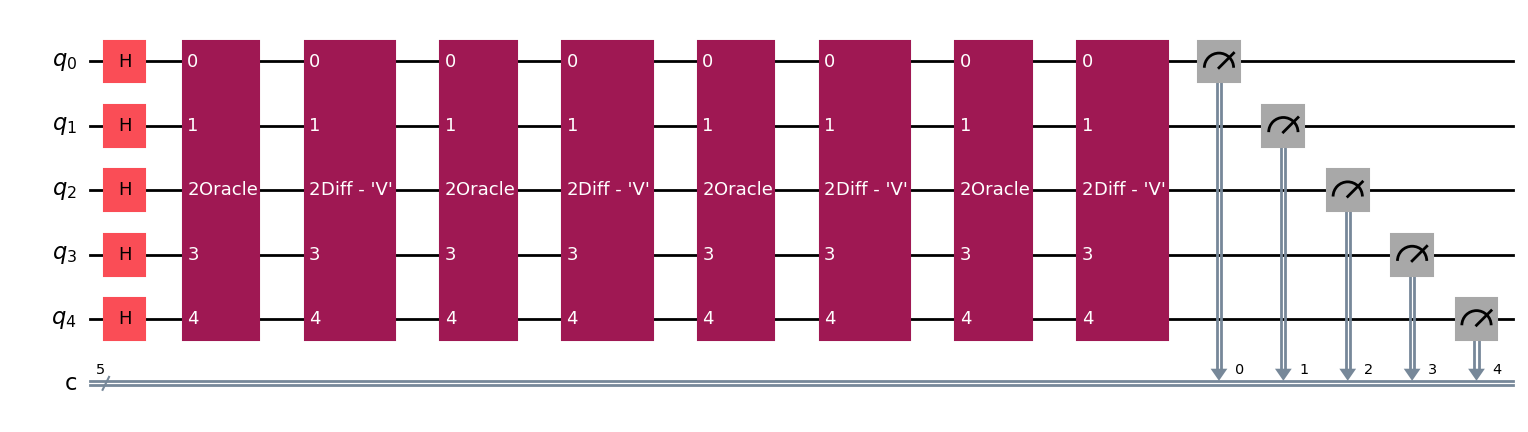

In [3]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)
qc.draw("mpl")

In [4]:
simulator = AerSimulator()
print(simulator.available_devices())
print(simulator.available_methods())

('CPU',)
('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')


{'00000': 1, '10010': 1, '11001': 1, '01000': 1, '01001': 1, '10011': 1, '10100': 1, '11110': 1, '00100': 1, '10000': 9991}


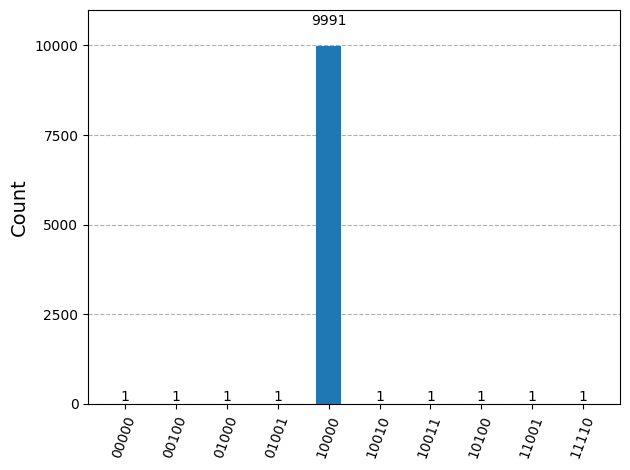

In [5]:
qct = transpile(qc, simulator)
result = simulator.run(qct, shots=10000).result()
counts = result.get_counts(qct)
print(counts)
plot_histogram(counts)

3 qubits, basis state [5, 2], 1 rounds


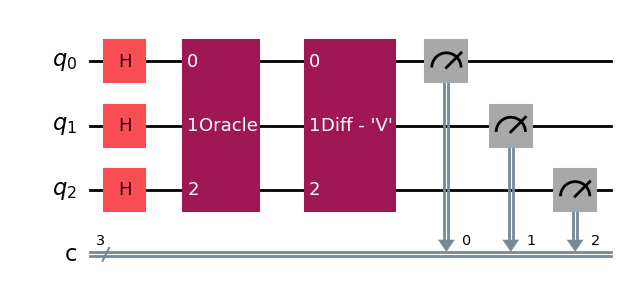

In [6]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y = np.random.randint(2**n)
marked = [x,y]
qc = Grover(n, marked)
qc.draw("mpl")

{'010': 498, '101': 526}


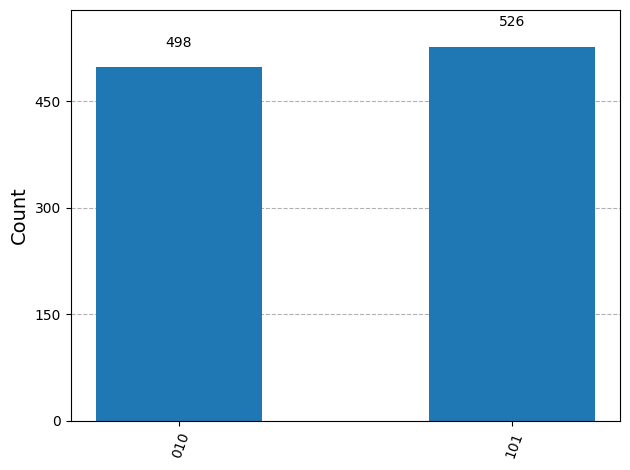

In [7]:
qct = transpile(qc, simulator)
result = simulator.run(qct, shots=1024).result()
counts = result.get_counts(qct)
print(counts)
plot_histogram(counts)